In [7]:
import time
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import bmi_cfe

# 1. Run Normal CFE Simulations

In [12]:
cfe_instance = bmi_cfe.BMI_CFE('./cat58_config_cfe.json')

In [13]:
cfe_instance.initialize()

In [14]:
with open(cfe_instance.forcing_file, 'r') as f:
    df_forcing = pd.read_csv(f)
    
outputs = cfe_instance.get_output_var_names()
output_lists = {output:[] for output in outputs}

for precip in df_forcing['APCP_surface']:
    
    cfe_instance.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux', precip)
    
    cfe_instance.update()
    
    for output in outputs:
    
        output_lists[output].append(cfe_instance.get_value(output))

In [15]:
cfe_instance.finalize(print_mass_balance=True)


GLOBAL MASS BALANCE
  initial volume:   0.7456
    volume input: 259.2000
   volume output: 249.4341
    final volume:   1.7369
        residual: -1.8660e+00

PARTITION MASS BALANCE
    surface runoff: 257.3340
      infiltration:   1.8660
 vol. et from rain:   0.0000
partition residual: -6.4393e-15

GIUH MASS BALANCE
  vol. into giuh: 257.3340
   vol. out giuh: 246.6933
 vol. end giuh q:  10.6406
   giuh residual: -1.2790e-13

SOIL WATER MASS BALANCE
     init soil vol:   0.5856
    vol. into soil:   1.8660
  vol.soil2latflow:   1.5753
   vol. soil to gw:   1.9169
 vol. et from soil:   0.0000
   final vol. soil:   0.8254
  vol. soil resid.: -1.8660e+00

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   1.5753
  vol. from nash:   1.2716
 final vol. nash:   0.3037
nash casc resid.: 0.0000e+00

GROUNDWATER CONCEPTUAL RESERVOIR MASS BALANCE
init gw. storage:   0.1600
       vol to gw:   1.9169
     vol from gw:   1.1654
final gw.storage:   0.9115
    gw. residual: -3.330

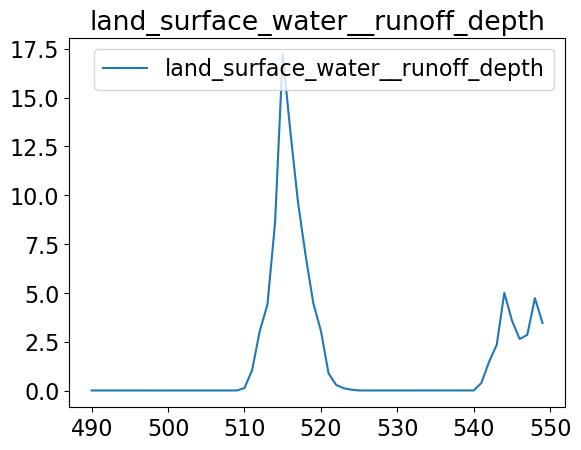

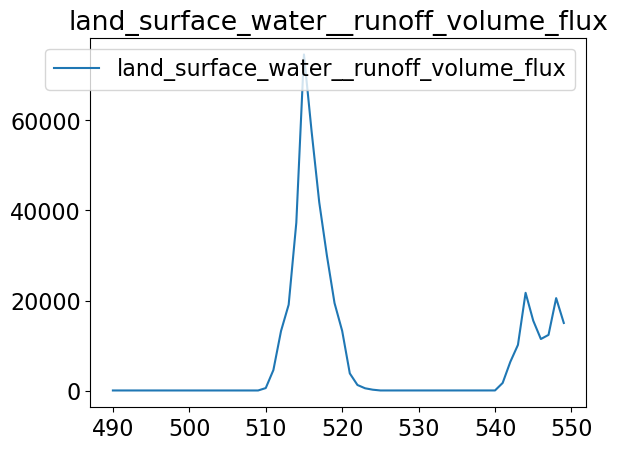

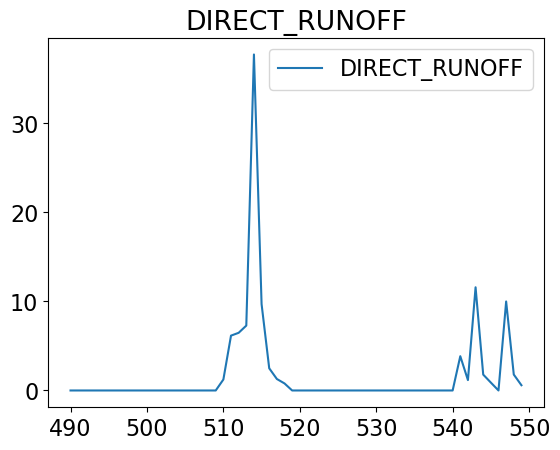

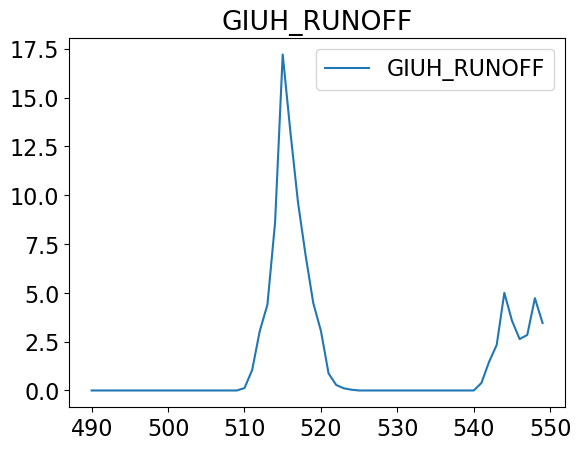

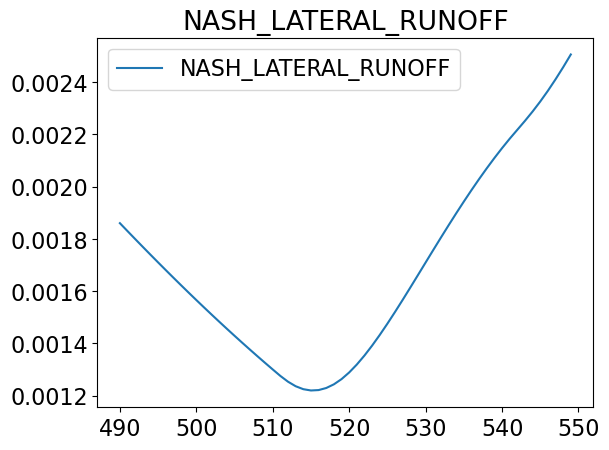

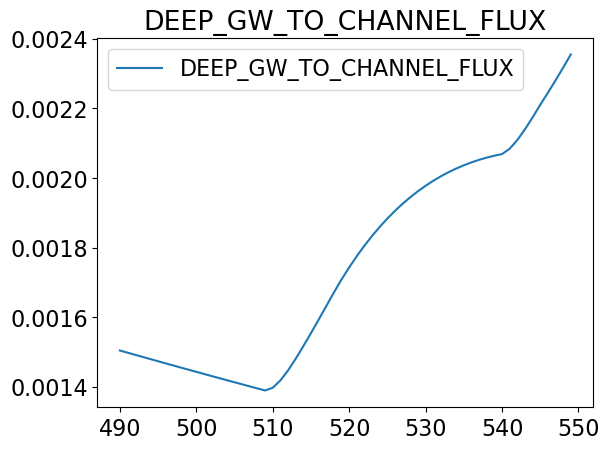

In [6]:
istart_plot = 490
iend_plot = 550
x = list(range(istart_plot, iend_plot))
for output in outputs:
    plt.plot(x, output_lists[output][istart_plot:iend_plot], label=output)
    plt.title(output)
    plt.legend()
    plt.show()
    plt.close()

# 2. Run Unit Tests

## 2.1. Test the Schaake routine

/Users/jf/python_cfe/bmi_cfe.py:481: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.cfe_output_data[t, 'SM storage']             = self.soil_reservoir['storage_m']


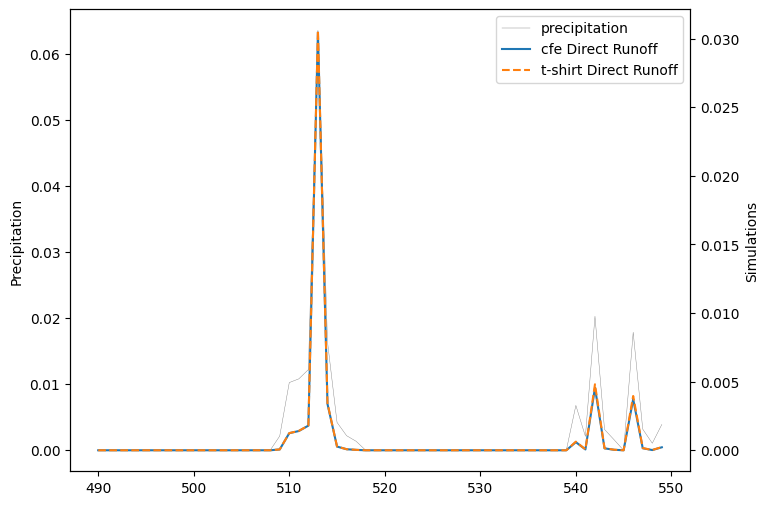

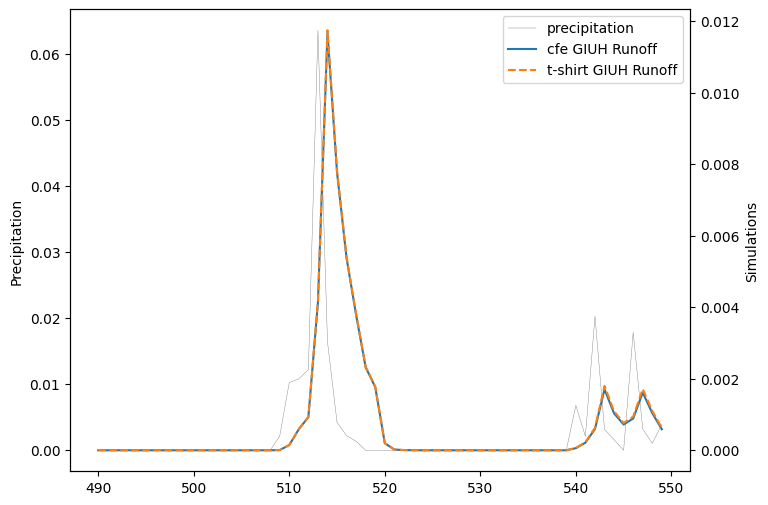

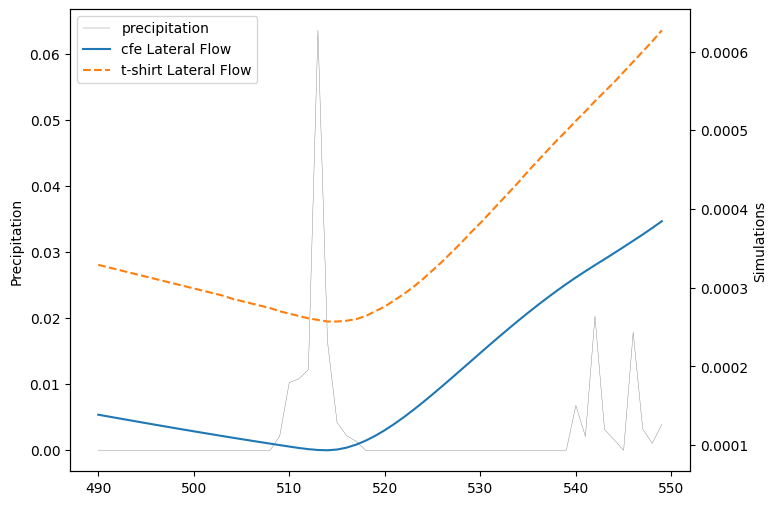

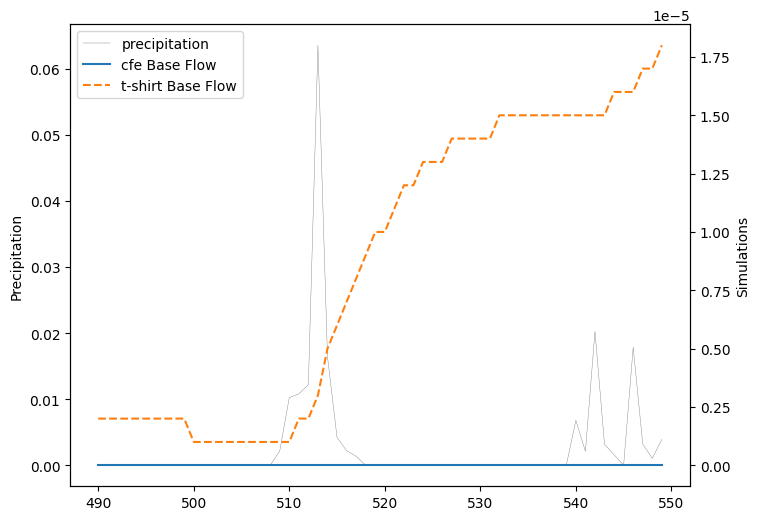

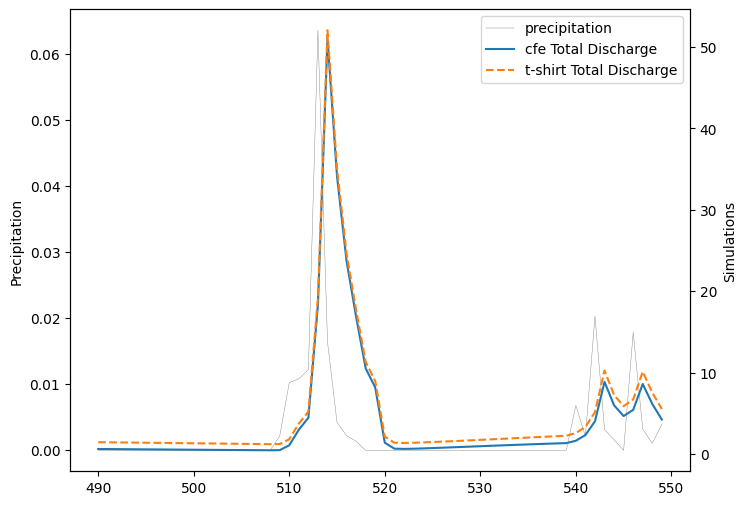

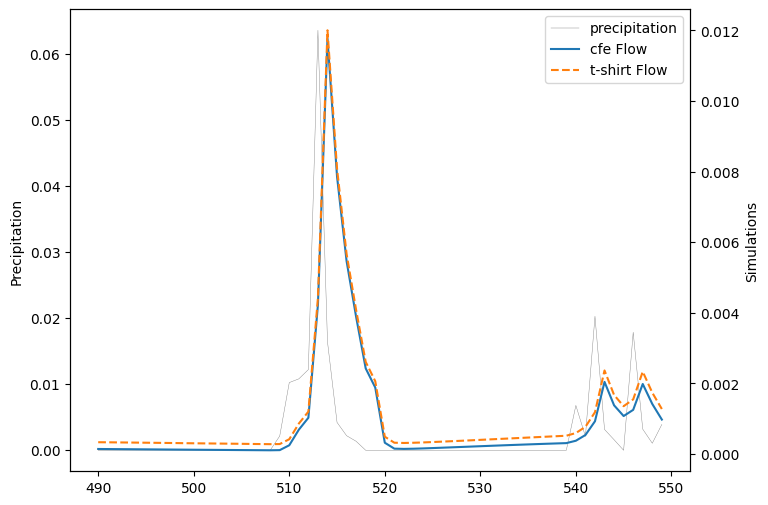

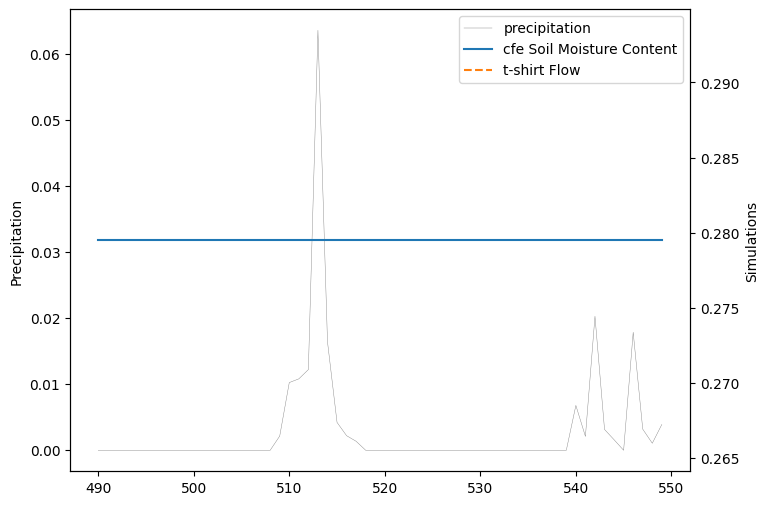

In [7]:
cfe_unit_test = bmi_cfe.BMI_CFE('./cat58_config_cfe.json')
cfe_unit_test.initialize()
cfe_unit_test.run_unit_test(plot=True, print_fluxes=False)

In [8]:
cfe_unit_test.unit_test_data

,Time Step,Time,Rainfall,Direct Runoff,GIUH Runoff,Lateral Flow,Base Flow,Flow,Total Discharge
0,0,2015-12-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000620,0.000620,2.691000
1,1,2015-12-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000583,0.000583,2.528061
2,2,2015-12-01 02:00:00,0.000000,0.000000,0.000000,0.000002,0.000548,0.000550,2.385627
3,3,2015-12-01 03:00:00,0.000000,0.000000,0.000000,0.000007,0.000515,0.000521,2.262081
4,4,2015-12-01 04:00:00,0.000000,0.000000,0.000000,0.000013,0.000484,0.000497,2.155921
...,...,...,...,...,...,...,...,...,...
715,715,2015-12-30 19:00:00,0.006538,0.000644,0.005279,0.000586,0.000011,0.005875,25.485904
716,716,2015-12-30 20:00:00,0.007422,0.000828,0.003946,0.000588,0.000012,0.004546,19.719590
717,717,2015-12-30 21:00:00,0.014680,0.002953,0.002989,0.000592,0.000013,0.003594,15.592070
718,718,2015-12-30 22:00:00,0.005826,0.000544,0.003060,0.000597,0.000014,0.003671,15.923394


In [9]:
cfe_unit_test.finalize(print_mass_balance=True)


GLOBAL MASS BALANCE
  initial volume:   0.7456
    volume input:   0.4548
   volume output:   0.2690
    final volume:   0.9298
        residual: 6.8196e-16

PARTITION MASS BALANCE
    surface runoff:   0.0973
      infiltration:   0.3575
 vol. et from rain:   0.0000
partition residual: -5.5511e-17

GIUH MASS BALANCE
  vol. into giuh:   0.0973
   vol. out giuh:   0.0957
 vol. end giuh q:   0.0016
   giuh residual: 1.5829e-17

SOIL WATER MASS BALANCE
     init soil vol:   0.5856
    vol. into soil:   0.3575
  vol.soil2latflow:   0.1733
   vol. soil to gw:   0.2108
 vol. et from soil:   0.0000
   final vol. soil:   0.5590
  vol. soil resid.: 6.3838e-16

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   0.1733
  vol. from nash:   0.1444
 final vol. nash:   0.0289
nash casc resid.: 3.4694e-17

GROUNDWATER CONCEPTUAL RESERVOIR MASS BALANCE
init gw. storage:   0.1600
       vol to gw:   0.2108
     vol from gw:   0.0000
final gw.storage:   0.3708
    gw. residual: -1.1102e-

## 2.2. Test the Xinanjiang Routine

/Users/jf/python_cfe/bmi_cfe.py:481: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.cfe_output_data[t, 'SM storage']             = self.soil_reservoir['storage_m']


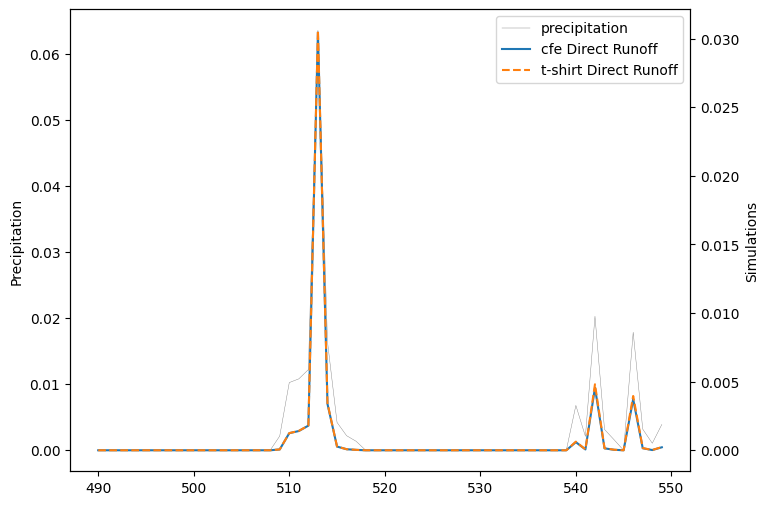

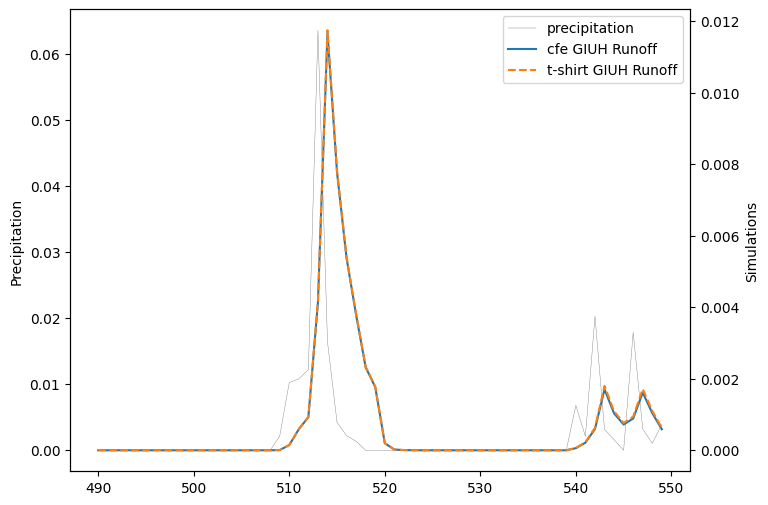

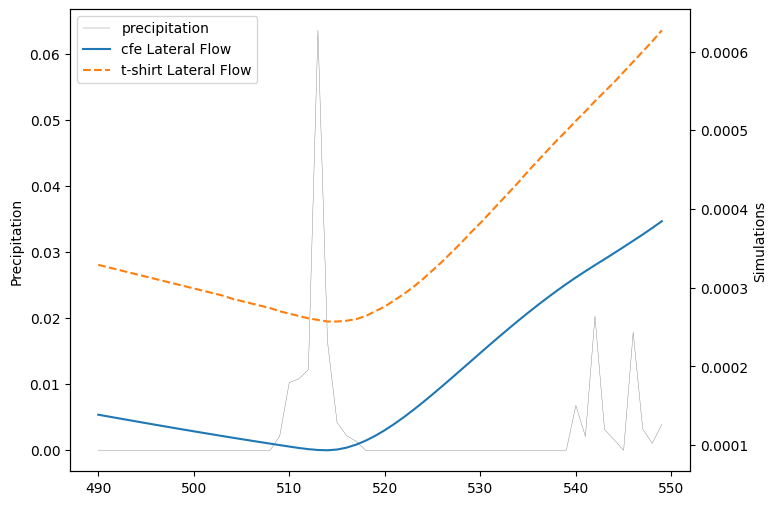

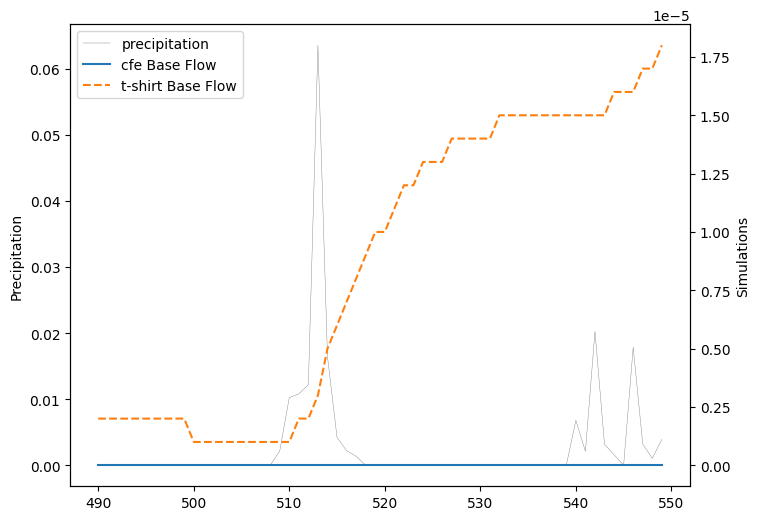

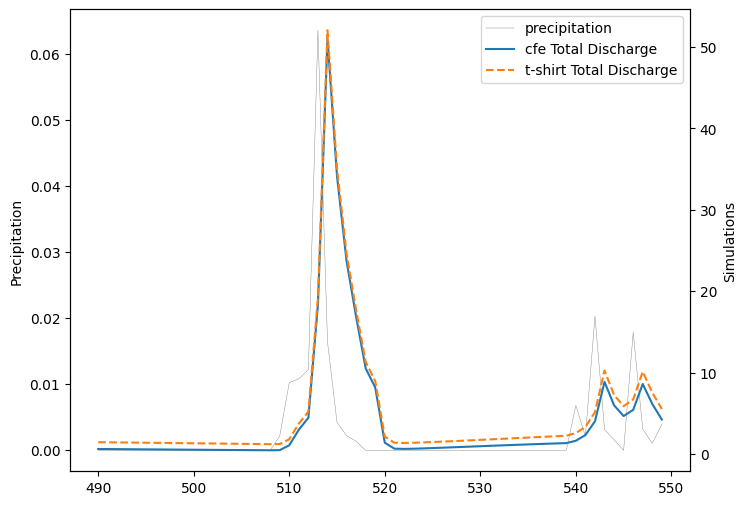

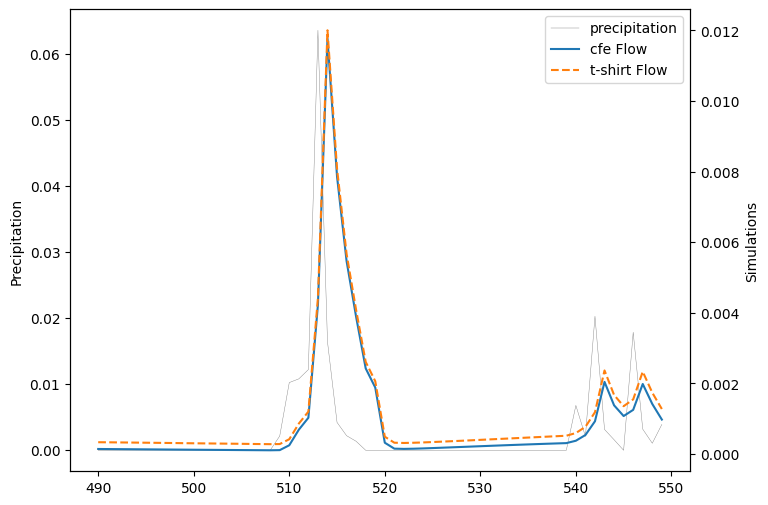

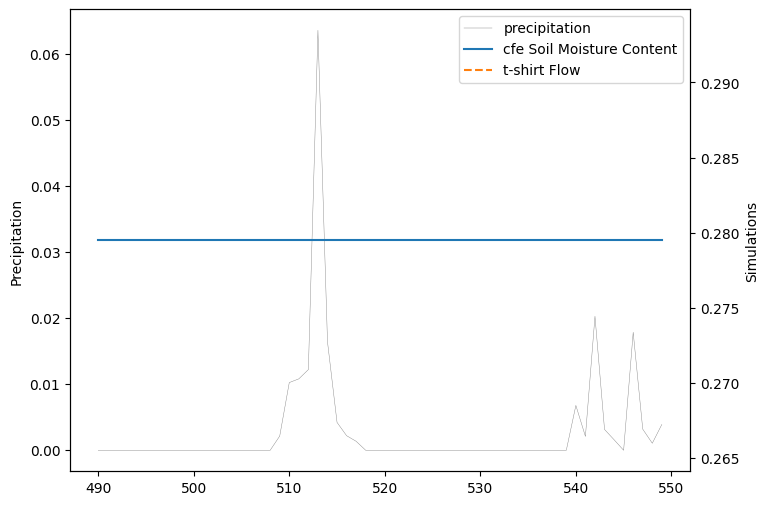

In [10]:
cfe_unit_test_x = bmi_cfe.BMI_CFE('./cat58_config_cfe.json')
cfe_unit_test_x.initialize()
cfe_unit_test_x.run_unit_test(plot=True, print_fluxes=False)

In [11]:
cfe_unit_test_x.surface_partitioning_scheme

'Schaake'

In [12]:
cfe_unit_test_x.finalize(print_mass_balance=True)


GLOBAL MASS BALANCE
  initial volume:   0.7456
    volume input:   0.4548
   volume output:   0.2690
    final volume:   0.9298
        residual: 6.8196e-16

PARTITION MASS BALANCE
    surface runoff:   0.0973
      infiltration:   0.3575
 vol. et from rain:   0.0000
partition residual: -5.5511e-17

GIUH MASS BALANCE
  vol. into giuh:   0.0973
   vol. out giuh:   0.0957
 vol. end giuh q:   0.0016
   giuh residual: 1.5829e-17

SOIL WATER MASS BALANCE
     init soil vol:   0.5856
    vol. into soil:   0.3575
  vol.soil2latflow:   0.1733
   vol. soil to gw:   0.2108
 vol. et from soil:   0.0000
   final vol. soil:   0.5590
  vol. soil resid.: 6.3838e-16

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   0.1733
  vol. from nash:   0.1444
 final vol. nash:   0.0289
nash casc resid.: 3.4694e-17

GROUNDWATER CONCEPTUAL RESERVOIR MASS BALANCE
init gw. storage:   0.1600
       vol to gw:   0.2108
     vol from gw:   0.0000
final gw.storage:   0.3708
    gw. residual: -1.1102e-